# Scattering properties using Mie Theory

In this notebook we provide some examples showing how NemesisPy can be used to calculate the scattering properties of aerosols. In particular, the calculations of the extinction coefficient, single scattering albedo and phase functions are performed using the miepython library. These calculations for a single particle size are integrated following the equations from Hansen and Travis (1974) to derive the effective properties for different particle size distributions.

These calculations are analogous to those performed by the $Makephase$ program of the Fortran version of NEMESIS.

In [29]:
#Importing libraries
from NemesisPy import *
import numpy as np
import matplotlib.pyplot as plt

### Reading the refractive indices from the dictionary

First of all, we need to define the refractive index of the aerosol we want to model. NemesisPy includes a dictionary of different aerosols, but it might not include the one you want to study. In that case, you can add yourself the refractive index of a new aerosol type in the file $\textit{Data/aerosol_data.py}$.

Let's look at reading and plotting the refractive index for Mars' dust particles (ID=1).

Text(0, 0.5, 'Refractive index')

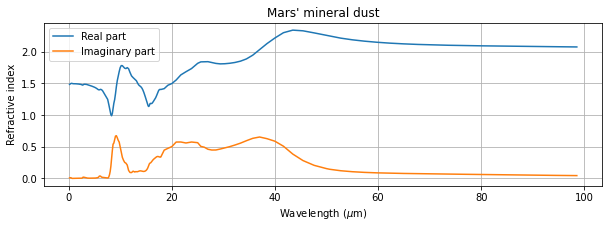

In [30]:
#First we initialise the Scatter class
Scatter = Scatter_0()

Scatter.read_refind(1)  #Reading the refractive index from the dictionary

fig,ax1 = plt.subplots(1,1,figsize=(10,3))
ax1.plot(Scatter.WAVER,Scatter.REFIND_REAL,label='Real part')
ax1.plot(Scatter.WAVER,Scatter.REFIND_IM,label='Imaginary part')
ax1.legend()
ax1.grid()
ax1.set_title("Mars' mineral dust")
ax1.set_xlabel('Wavelength ($\mu$m)')
ax1.set_ylabel('Refractive index')

### Calculating the scattering properties for a single particle size

Now that we have defined the refractive index in the Scatter class, we can calculate the scattering properties for different particle size distributions. In this first case, we simply calculate the scattering properties of Mars' dust particles with a single size (r = 1.5 $\mu$m). This calculation is performed using the miescat function. More information about this function can be seen if typing $help(Scatter.miescat)$ in the Python terminal.

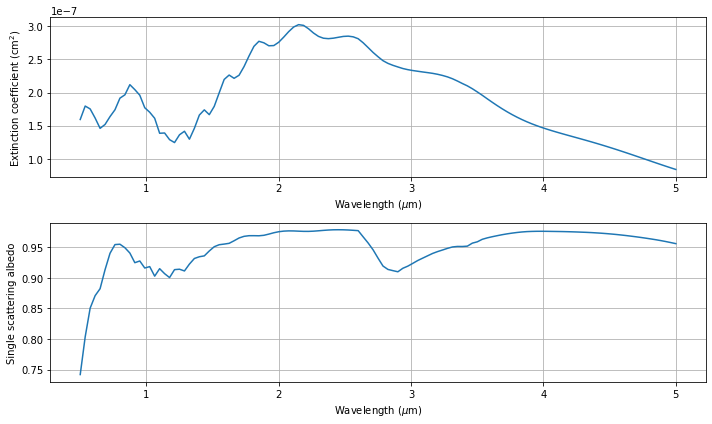

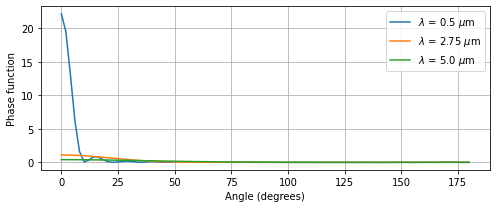

In [31]:
#First of all we need to define our wavelength or wavenumber array 
#and tell the class in what units we want these calculations (wavenumber in cm-1 (ISPACE=0) or wavelength in um (ISPACE=1))
Scatter.ISPACE = 1 #Wavelength

NDUST = 4      #Number of aerosol populations that we want to include in our atmosphere
NWAVE = 121    #Number of spectral points
NTHETA = 91    #Number of phase angles for defining the phase function
wavel = np.linspace(0.5,5.,NWAVE)
theta = np.linspace(0.,180.,NTHETA)

#Now we initialise the arrays that will be filled with the calculations
Scatter.initialise_arrays(NDUST,NWAVE,NTHETA)
Scatter.WAVE = wavel
Scatter.THETA = theta

#Now we perform the calculations
IDUST = 0          #Aerosol population for which the calculations must be performed (from 0 to NDUST - 1)
psdist = 0         #Distribution type (0 - Single particle size)
pardist = [1.5]    #Particle size in microns
Scatter.miescat(IDUST,psdist,pardist)

#Plotting the extinction coefficient and single scattering albedo
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,6))

ax1.plot(Scatter.WAVE,Scatter.KEXT[:,IDUST])
ax1.grid()
ax1.set_ylabel('Extinction coefficient (cm$^2$)')
ax1.set_xlabel('Wavelength ($\mu$m)')

ax2.plot(Scatter.WAVE,Scatter.SGLALB[:,IDUST])
ax2.grid()
ax2.set_ylabel('Single scattering albedo')
ax2.set_xlabel('Wavelength ($\mu$m)')
plt.tight_layout()

#Plotting the phase function for three wavelengths
fig,(ax1) = plt.subplots(1,1,figsize=(7,3))

iwave = 0
ax1.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST],label='$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')
iwave = int(Scatter.NWAVE/2)
ax1.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST],label='$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')
iwave = Scatter.NWAVE - 1
ax1.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST],label='$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')

ax1.set_xlabel('Angle (degrees)')
ax1.set_ylabel('Phase function')
ax1.grid()
ax1.legend()
plt.tight_layout()



### Calculating the scattering properties for a log-normal distribution

Similarly, we can calculate the scattering properties for a log-normal distribution using the same $miescat$ function. In this example, we calculate the scattering properties for a log-normal distribution with $\mu$ = 1.0 $\mu$m and a standard deviation of $\sigma$ = 0.316 (Variance $\nu$ = 0.1).

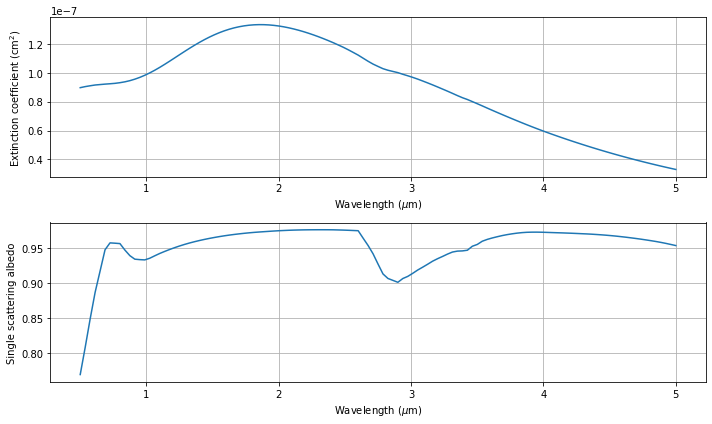

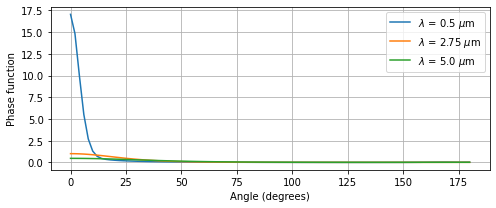

In [32]:
IDUST = 1                #Aerosol population for which the calculations must be performed (from 0 to NDUST - 1)
psdist = 1               #Distribution type (1 - Log-normal distribution)
pardist = [1.0,0.316]    #Mean radius and standard deviation
Scatter.miescat(IDUST,psdist,pardist)

#Plotting the extinction coefficient and single scattering albedo
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,6))

ax1.plot(Scatter.WAVE,Scatter.KEXT[:,IDUST])
ax1.grid()
ax1.set_ylabel('Extinction coefficient (cm$^2$)')
ax1.set_xlabel('Wavelength ($\mu$m)')

ax2.plot(Scatter.WAVE,Scatter.SGLALB[:,IDUST])
ax2.grid()
ax2.set_ylabel('Single scattering albedo')
ax2.set_xlabel('Wavelength ($\mu$m)')
plt.tight_layout()

#Plotting the phase function for three wavelengths
fig,(ax1) = plt.subplots(1,1,figsize=(7,3))

iwave = 0
ax1.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST],label='$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')
iwave = int(Scatter.NWAVE/2)
ax1.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST],label='$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')
iwave = Scatter.NWAVE - 1
ax1.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST],label='$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')

ax1.set_xlabel('Angle (degrees)')
ax1.set_ylabel('Phase function')
ax1.grid()
ax1.legend()
plt.tight_layout()



### Calculating the scattering properties for a standard gamma distribution

Similarly, we can calculate the scattering properties for a standard gamma distribution using the same $miescat$ function. In this example, we calculate the scattering properties for a standard gamma distribution with $a$ = $r_{eff}$ = 1.0 $\mu$m and $b$ = $\nu_{eff}$ = 0.3. However, in this case we are going to calculate it for water ice particles (ID = 2), in order to show how different aerosol populations in the class can correspond to different aerosol types.

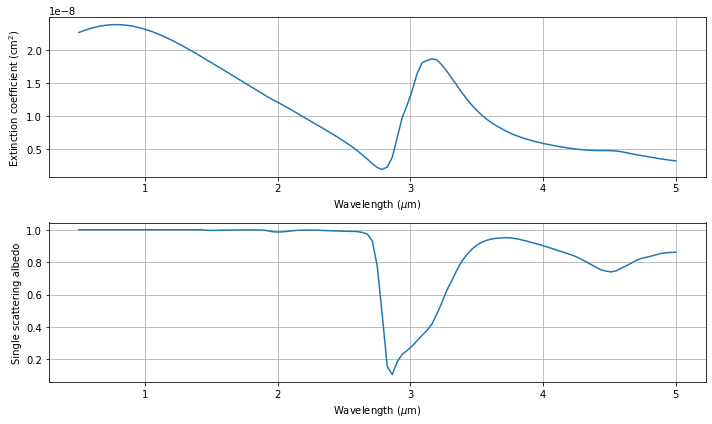

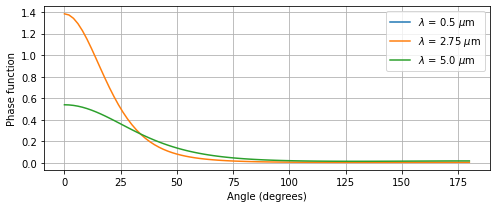

In [33]:
#First we update the refractive index
Scatter.read_refind(2)  #ID = 2 is water ice

#Now we simply perform the calculations, as all the other arrays are already defined
IDUST = 2                #Aerosol population for which the calculations must be performed (from 0 to NDUST - 1)
psdist = 2               #Distribution type (2 - Standard gamma distribution)
pardist = [1.0,0.3]      #a and b
Scatter.miescat(IDUST,psdist,pardist)

#Plotting the extinction coefficient and single scattering albedo
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,6))

ax1.plot(Scatter.WAVE,Scatter.KEXT[:,IDUST])
ax1.grid()
ax1.set_ylabel('Extinction coefficient (cm$^2$)')
ax1.set_xlabel('Wavelength ($\mu$m)')

ax2.plot(Scatter.WAVE,Scatter.SGLALB[:,IDUST])
ax2.grid()
ax2.set_ylabel('Single scattering albedo')
ax2.set_xlabel('Wavelength ($\mu$m)')
plt.tight_layout()

#Plotting the phase function for three wavelengths
fig,(ax1) = plt.subplots(1,1,figsize=(7,3))

iwave = 0
ax1.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST],label='$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')
iwave = int(Scatter.NWAVE/2)
ax1.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST],label='$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')
iwave = Scatter.NWAVE - 1
ax1.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST],label='$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')

ax1.set_xlabel('Angle (degrees)')
ax1.set_ylabel('Phase function')
ax1.grid()
ax1.legend()
plt.tight_layout()



### Calculating the scattering properties for any user-defined distribution

Alternatively, users may want to use particle size distributions not pre-defined in the miescat function. In that case, it is also possible to perform the calculations for a user-defined distribution. 

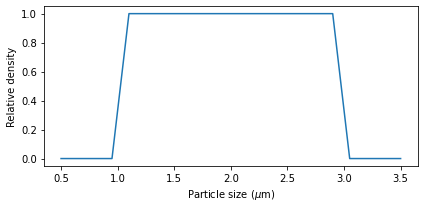

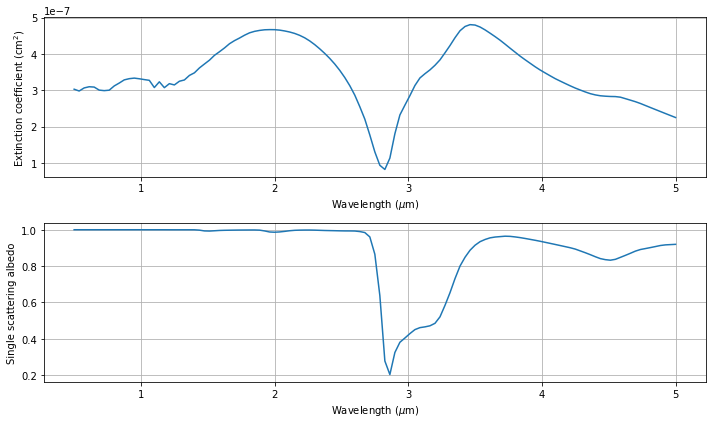

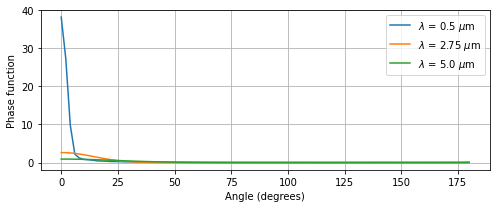

In [35]:
#We first define our particle size distribution
rd = np.linspace(0.5,3.5,21)
Nd = np.zeros(21)
iin = np.where( (rd>=1.) & (rd<=3.) )
Nd[iin] = 1.

fig,ax1 = plt.subplots(1,1,figsize=(6,3))
ax1.plot(rd,Nd)
ax1.set_xlabel('Particle size ($\mu$m)')
ax1.set_ylabel('Relative density')
plt.tight_layout()

#Now we perform the calculations
IDUST = 3                #Aerosol population for which the calculations must be performed (from 0 to NDUST - 1)
psdist = -1              #Distribution type (-1 - User-defined distribution)
pardist = []             #Empty array
Scatter.miescat(IDUST,psdist,pardist,rdist=rd,Ndist=Nd)


#Plotting the extinction coefficient and single scattering albedo
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,6))

ax1.plot(Scatter.WAVE,Scatter.KEXT[:,IDUST])
ax1.grid()
ax1.set_ylabel('Extinction coefficient (cm$^2$)')
ax1.set_xlabel('Wavelength ($\mu$m)')

ax2.plot(Scatter.WAVE,Scatter.SGLALB[:,IDUST])
ax2.grid()
ax2.set_ylabel('Single scattering albedo')
ax2.set_xlabel('Wavelength ($\mu$m)')
plt.tight_layout()

#Plotting the phase function for three wavelengths
fig,(ax1) = plt.subplots(1,1,figsize=(7,3))

iwave = 0
ax1.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST],label='$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')
iwave = int(Scatter.NWAVE/2)
ax1.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST],label='$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')
iwave = Scatter.NWAVE - 1
ax1.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST],label='$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')

ax1.set_xlabel('Angle (degrees)')
ax1.set_ylabel('Phase function')
ax1.grid()
ax1.legend()
plt.tight_layout()

